## Final Project Submission

Please fill out:
* Student name: Morgan Fell
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Mark Bourbor
* Blog post URL:


# Microsoft Movie Studio
Morgan Fell
1/4/2023

## Overview

I analyzed movie data from various sources to determine the best strategy for Microsoft's entrance into the entertainment industry. We selected data on popular movies released in the last 10 years and analyzed factors such as return on investment (RoI), studio profits, release timing, and the relationship between runtime and genre ranking. Our findings showed that the Walt-Disney-Fox conglomerate had the highest studio profits, suggesting that Microsoft could adopt a similar business model. We also found that genres such as Drama, Comedy, and Biographies have lower production budgets and higher RoIs. November releases tend to be the most profitable, though movie length can affect ratings.

## Business Understanding

The gateway to Microsoft successfully launching original content from their own entertainment studio relys on answering the following questions:
1. Which genres provide the largest return on investment?
2. How does the studio distributing the movie and the time of year it is released alter boxoffice performance?
3. Does the runtime of a film influence the popularity?

## Data Understanding
Large datasets from four major entermainment review websites were used to create a hollistic understanding. All of the tools required to filter, join, and visualize the sets are seen below. 

In [2]:
# All required tools were imported into the notebook
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [3]:
#A connection to the SQL database is established
conn = sqlite3.connect('im.db.sqlite')

### IMDb 
The Internet Movie Database(IMDb) is a website owned by Amazon that provides information about movies, TV shows, and other forms of entertainment.

In [4]:
#Importing the zipped IMDb data
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [5]:
#Importing tool that allows SQL commands in python
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

This code defines a function that checks if a file called 'im.db' exists in a folder called 'zippedData'. If the file exists, the function prints 'Success!'. If the file does not exist, the function prints 'Try Again.' The function uses the exists() method from the os.path module to determine if the file exists.

In [6]:
from os.path import exists
file_exists = exists('zippedData/im.db')
if file_exists:
    print('Success!')
else:
    print('''
          Try Again.
          ''')

Success!


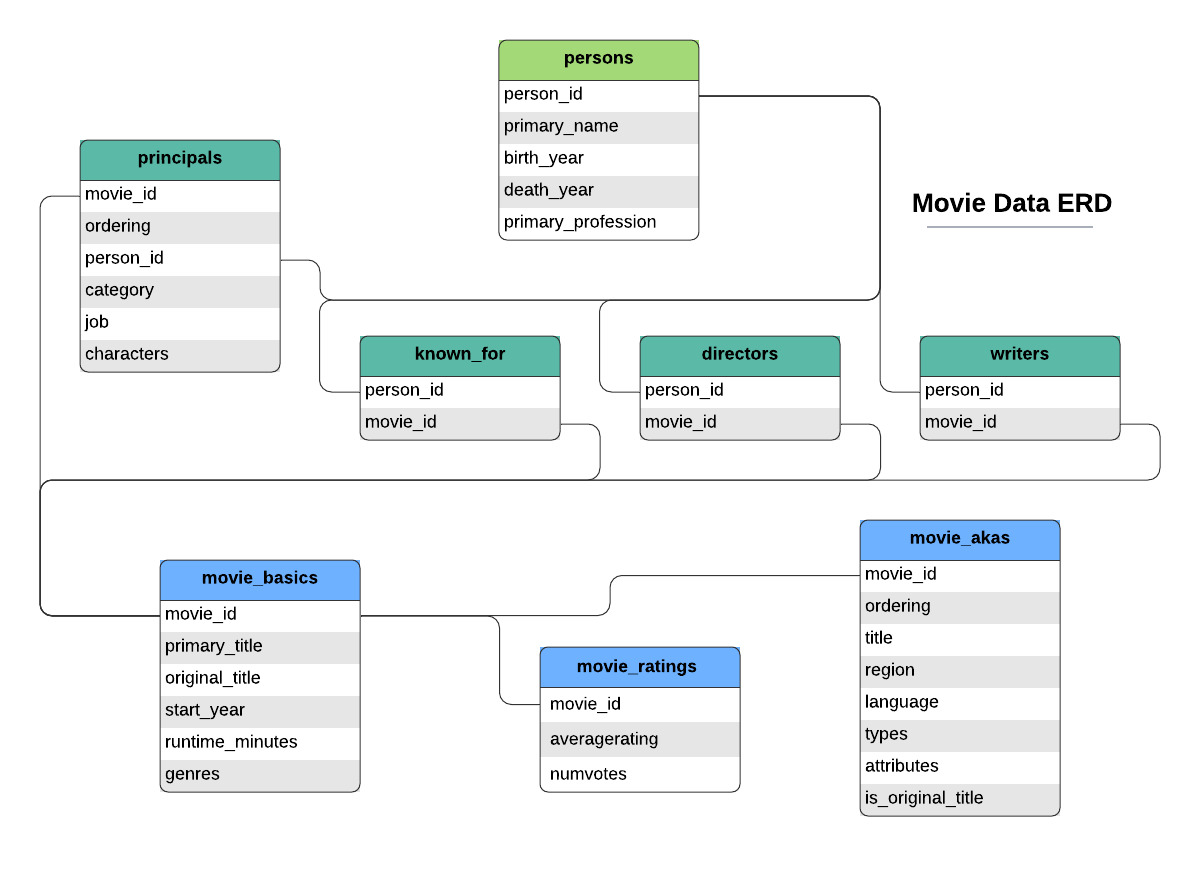

In [7]:
#Connecting to the specific SQL Movie Data ERD set and printing the list of tables present 
conn = sqlite3.connect('zippedData/im.db')
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


I will use the Pandas function *read_sql()* to execute a SQL query and store the result in a Pandas DataFrame called *imdb_movie_ratings*. The SQL query being executed is 'SELECT * FROM movie_ratings', which will select all columns and rows from a table called *movie_ratings*. The connection object 'conn' is used to establish a connection to a database, and the resulting data is stored in the DataFrame. The head() method is then called on the DataFrame to display the first 5 rows of the data.

This method is used for the *movie_basics* dataset too. 

In [8]:
#Query for opening the movie_ratings table
q2 = """SELECT * FROM movie_ratings"""
imdb_movie_ratings = pd.read_sql(q2, conn)
#Printing the top 5 rows to check data
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This code calls the info() method on the dataset *imdb_movie_basics*. The info() method is typically used to obtain information about a Pandas DataFrame. I will be using it moving forward to display the number of rows and columns in the DataFrame, the name of each column, and the data type of each column. It may also display other information about the DataFrame, such as the memory usage.

In [9]:
#Datatypes and size 
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
#Query for opening movie_basics table
q3 = """SELECT * FROM movie_basics"""
imdb_movie_basics = pd.read_sql(q3, conn)
#Printing the top 5 rows to check data
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
#Datatypes and size
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


### The Movie Database (TMDb)
The TMDb (The Movie Database) is a non-profit, community-driven database of movies and TV shows that provides information about cast and crew, plot summaries, and ratings.

The *read_csv()* function from the Pandas library is used to read in a CSV file called 'tmdb.movies.csv.gz' and store it in a Pandas DataFrame called *tmdb_df_og*. The first column of the CSV file is being used as the index for the DataFrame. The 'release_date' column is being parsed as a date data type. Finally, the DataFrame is printed to the notebook. 

In [12]:
#Opening CSV file with date formating
tmdb_df_og = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col = 0, 
                      parse_dates=['release_date'])
#Printing the dataset
tmdb_df_og

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
#Datatypes and size
tmdb_df_og.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


### The Numbers 
The Numbers is a website that provides financial data and analysis on the film and TV industries.

The *read_csv()* function from the Pandas library is used to read in a CSV file called 'tn.movie_budgets.csv.gz' and store it in a Pandas DataFrame called *df_budgets*. The first column of the CSV file is being used as the index for the DataFrame. The 'release_date' column is being parsed as a date data type. Finally, the DataFrame is printed to the notebook.

In [14]:
#Opening csv file with date formating
df_budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz', index_col = 0,
                     parse_dates=['release_date'])
df_budgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,2018-12-31,Red 11,"$7,000",$0,$0
79,1999-04-02,Following,"$6,000","$48,482","$240,495"
80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [15]:
#Datatypes and size
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   object        
 3   domestic_gross     5782 non-null   object        
 4   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 271.0+ KB


### BoxOffice Mojo
Box Office Mojo is a website that tracks box office data for movies and other forms of entertainment.

I used the *read_csv()* function from the Pandas library to read in a CSV file called 'bom.movie_gross.csv.gz' and store it in a Pandas DataFrame called *df_mojo*. The first column of the CSV file is being used as the index for the DataFrame. The head() method is then called on the DataFrame to display the first 5 rows of the data.

In [16]:
#Opening csv file
df_mojo = pd.read_csv('./zippedData/bom.movie_gross.csv.gz', index_col = 0)
df_mojo.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
#Datatypes and size
df_mojo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


# Methods
To prepare the data for visualizations I will be using the following steps to clean each set to answer the questions listed at the beginning.

**Question 1:** Both SQL tables, *movie_basics* and *movie_ratings* will be filtered for release dates and ratings. This will then be joined the cleaned *tn_data_og* set using the primary title. Two new cou=lumns will be added for the month of release and the return on investment of genres. Only genres that met the average number of films will be used for visuals. 

1. Filter each database to focus on movies released from 2012-2022 that received at least the average rating of that set. Do not filter the BoxOffice Mojo dataset based on audience ranking.
2. Create a large dataframe by joining the IMDb movie_ratings and movie_basics with The Numbers's dataset.
-------------------------------------------------------------------------------------------------------------------------------
**Question 3** From the joint dataframes a new column will need to represent the best time of year for releases

3. Create a RoI column and filter the data to include only the month of movie release. 
-------------------------------------------------------------------------------------------------------------------------------
**Question 2** BoxOffice Mojo provides studio performance that can be used to point Microsoft towards a successful studio whose strategies and processes they could mirror 

4. Calculate the average number of films per genre (35.4). Only include genres that meet or exceed this average when generating visualizations.
5. Check if the music and musical genres should be combined.
6. Drop null values and filter out films with domestic gross below the average from the BoxOffice Mojo dataset.
7. Create a new column to represent total profit from domestic and foreign gross values. Calculate the average profit for each studio.
8. Combine duplicate studios, such as Lionsgate Films and Lionsgate Studio.
9. Assign parent studios to each film using the abbreviations to create a dictionary

### IMDB Cleaning

I wanted to calculate the average and maximum number of votes for each movie in the movie_ratings table for filtering purposes. The connection object 'conn' is used to establish a connection to a database, and the resulting data is stored in the DataFrame, *avg_vote*. Finally, the DataFrame is printed to the console.

In [76]:
imdb_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


A seperate function is needed for the average number of votes since it is not included in the description above. 

In [77]:
#Calculating the average votes and maximum number of votes to create a filter point
avg_votes = pd.read_sql("""SELECT AVG(numvotes) AS avg_votes FROM movie_ratings;""", conn)
avg_votes

,avg_votes
0,3523.662167


The parameters established in the calculations above will be used to filter the data down to only top performing movies that met at least the average number of votes for that rating. 
- A SQL query that joins the movie_ratings and movie_basics tables using the movie_id column. The resulting data is stored in a Pandas DataFrame called *df_imdb*. 
- The query includes a WHERE clause that filters the data to include only movies with at least 3500 votes and an average rating of 6.3 or higher. 
- The data is then sorted in descending order by the averagerating column. 
- The original_title column is then dropped from the DataFrame using the drop() method. The 'axis' parameter is set to 1 to indicate that the operation should be performed along columns.

In [74]:
#Joining movie_ratings with movie_basics using the limits of needing at least 3500 votes and an average rating of 7.5 based on the values from above
q4 = """
    SELECT * 
    FROM movie_ratings
    JOIN movie_basics USING(movie_id)
    WHERE numvotes >= 3500 AND averagerating >= 6.3 
    ORDER BY averagerating DESC
""" 
df_imdb = pd.read_sql(q4, conn)

#The original_title column is unnecessary given the primary_title
df_imdb.drop(['original_title'], axis=1)

,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
1,tt5963218,9.5,6509,Aloko Udapadi,2017,113.0,"Drama,History"
2,tt7738784,9.4,9629,Peranbu,2018,147.0,Drama
3,tt5813916,9.3,100568,The Mountain II,2016,135.0,"Action,Drama,War"
4,tt5354160,9.3,18470,Aynabaji,2016,147.0,"Crime,Mystery,Thriller"
...,...,...,...,...,...,...,...
2819,tt3813310,6.3,27081,Cop Car,2015,88.0,"Crime,Thriller"
2820,tt4799064,6.3,9192,Mindhorn,2016,89.0,Comedy
2821,tt0980970,6.3,129663,The Chronicles of Narnia: The Voyage of the Da...,2010,113.0,"Adventure,Family,Fantasy"
2822,tt2908856,6.3,8016,My Old Lady,2014,107.0,"Comedy,Drama,Romance"


To make it easier to count the movies in each genre I needed to pull them out of grouped column and row into their own individual row. 
- The apply() function is called on the 'genres' column of the *df_imdb* DataFrame.
- The lambda function takes a value from the 'genres' column as input and splits it into a list by a comma.
- The resulting list is assigned back to the 'genres' column of the DataFrame.
- The explode() function passes the 'genres' column as an argument. This function creates a new row for each value in the 'genres' column.
- The modified DataFrame is then printed to the console.

In [78]:
#"apply" function and a lambda function split the values in the "genres" column of the data frame by a comma and assign the resulting list to the "genres" column.
df_imdb['genres'] = df_imdb['genres'].apply(lambda x: x.split(','))
#"explode" function to create a new row for each value in the "genres" column
df_imdb = df_imdb.explode('genres')
#Display dataframe
df_imdb

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Comedy
0,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,Drama
1,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,Drama
1,tt5963218,9.5,6509,Aloko Udapadi,Aloko Udapadi,2017,113.0,History
2,tt7738784,9.4,9629,Peranbu,Peranbu,2018,147.0,Drama
...,...,...,...,...,...,...,...,...
2822,tt2908856,6.3,8016,My Old Lady,My Old Lady,2014,107.0,Comedy
2822,tt2908856,6.3,8016,My Old Lady,My Old Lady,2014,107.0,Drama
2822,tt2908856,6.3,8016,My Old Lady,My Old Lady,2014,107.0,Romance
2823,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,Action


I wanted to know how many films were now accounted for after the genres became single rows. 

In [79]:
#Calculates the number of movies in each genre
df_imdb.genres.value_counts()

Drama          1808
Comedy          823
Action          618
Crime           464
Thriller        426
Romance         417
Adventure       390
Biography       353
Documentary     222
Mystery         211
Horror          170
History         167
Animation       159
Fantasy         145
Sci-Fi          139
Music           104
Family           82
War              69
Sport            65
Musical          20
Western          18
News              6
Name: genres, dtype: int64

### The Numbers Cleaning

- Null values cannot be present for calculations, so the *dropna()* function is used to remove any rows with null values. 
- Films need to be able to succeed not only within the U.S. but worldwide meaning the domestic_gross column was not needed moving forward. 

In [23]:
#Null values were dropped from the data table
df_budgets.dropna()
#The domestic_gross column is dropped 
df_budgets_clean = df_budgets.drop('domestic_gross', axis=1)
df_budgets_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,"$425,000,000","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"
...,...,...,...,...
78,2018-12-31,Red 11,"$7,000",$0
79,1999-04-02,Following,"$6,000","$240,495"
80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338"


Columns with dollar signs and commas need to be cleaned to allow calculations:
- A function called convert_monies() is defined that takes in a DataFrame and a column name as arguments.
- The function converts the values in the specified column from strings to numeric values by using the str.replace() and to_numeric() methods from Pandas. The str.replace() method is used to remove commas and dollar signs from the values.
- The function returns the modified DataFrame.
- The convert_monies() function is called twice, passing the df_budgets_clean DataFrame and the 'production_budget' and 'worldwide_gross' columns as arguments. This converts the values in these columns from strings to numeric values.

In [24]:
#Defining a function called "convert_monies" that takes in a data frame and a column name as arguments. The function converts the values in the specified column from strings to numeric values by removing commas and dollar signs. The function then returns the modified data frame.
def convert_monies(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(",", "").str.replace("$", ""))
    
    return df
#Function used to convert two columns from strings to numerics
convert_monies(df_budgets_clean, 'production_budget')
convert_monies(df_budgets_clean, 'worldwide_gross')

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
78,2018-12-31,Red 11,7000,0
79,1999-04-02,Following,6000,240495
80,2005-07-13,Return to the Land of Wonders,5000,1338


After seeing zeros present in the 'worldwide gross' column I needed to remove them from the dataframe due to lack of success. 

In [25]:
#Any rows with zero dollar worldwide gross is removed from dataframe
df_tn_clean = df_budgets_clean[df_budgets_clean["worldwide_gross"] != 0]
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
1,2009-12-18,Avatar,425000000,2776345279
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
...,...,...,...,...
76,2006-05-26,Cavite,7000,71644
77,2004-12-31,The Mongol King,7000,900
79,1999-04-02,Following,6000,240495


In [ ]:
I only wanted movies from the last ten years included 

In [26]:
#The release_date column needs to be January 1st, 2012 or higher 
df_tn_clean = df_tn_clean[(df_tn_clean['release_date'] >= '2012-01-01')]
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,2048134200
...,...,...,...,...
20,2015-07-31,Counting,50000,8374
38,2016-03-18,Krisha,30000,144822
45,2017-01-27,Emily,27000,3547


Looking at the world_wide gross column I can see we still have some low profits, so I first sorted the column from greatest to least worldwide_gross. A .describe() function is used to find the average so that the low performing films can be removed

In [80]:
#Sorting the worldwide_gross column from most money made to least
df_tn_filtered = df_tn_clean.sort_values(by='worldwide_gross', ascending=False)
df_tn_filtered

,release_date,movie,production_budget,worldwide_gross
id,,,,
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,2048134200
34,2015-06-12,Jurassic World,215000000,1648854864
67,2015-04-03,Furious 7,190000000,1518722794
27,2012-05-04,The Avengers,225000000,1517935897
...,...,...,...,...
80,2015-12-31,"To Be Frank, Sinatra at 100",2000000,926
67,2018-05-11,Higher Power,500000,528
84,2014-12-31,Destiny,750000,450


In [81]:
df_tn_clean.describe()

,production_budget,worldwide_gross
count,1.423000e+03,1.423000e+03
mean,4.238404e+07,1.381496e+08
std,5.527854e+07,2.398908e+08
min,9.000000e+03,2.600000e+01
25%,7.000000e+06,7.275209e+06
50%,2.000000e+07,4.426427e+07
75%,5.000000e+07,1.501170e+08
max,3.500000e+08,2.053311e+09


The average worldwide_gross is $138,000,000, so I want to remove any movie that performed below this number

In [83]:
#The condition is that the 'worldwide_gross' column must be greater than or equal to 138000000. The resulting DataFrame is then printed to the console.
df_tn_clean = df_tn_clean[(df_tn_clean['worldwide_gross'] >= 138000000)]
df_tn_clean

,release_date,movie,production_budget,worldwide_gross
id,,,,
3,2019-06-07,Dark Phoenix,350000000,149762350
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220
7,2018-04-27,Avengers: Infinity War,300000000,2048134200
...,...,...,...,...
49,2017-02-24,Get Out,5000000,255367951
50,2017-01-20,Split,5000000,278964806
53,2013-09-13,Insidious Chapter 2,5000000,161921515


In [84]:
#Checking that the last function worked. I can see the minimum increased from 260 to my limit of 138000000.
df_tn_clean.describe()

,production_budget,worldwide_gross
count,3.740000e+02,3.740000e+02
mean,1.066642e+08,4.270835e+08
std,6.946476e+07,3.191802e+08
min,5.000000e+06,1.388368e+08
25%,5.000000e+07,2.041138e+08
50%,9.300000e+07,3.106131e+08
75%,1.542500e+08,5.341481e+08
max,3.500000e+08,2.053311e+09


I now want to create a column with the return on investment. I want to remove the production budget from the worldwide gross show the true profit after the movie was invested. 
- A new column called "RoI" is added to the df_tn_clean DataFrame.
- The values in the "RoI" column are calculated by subtracting the 'production_budget' column from the 'worldwide_gross' column and dividing the result by the 'production_budget' column. The result is then multiplied by 100.

In [154]:
#Create a new column with the percent return on investment. 
df_tn_clean.loc[:, "RoI"] = ((df_tn_clean['worldwide_gross'] - df_tn_clean['production_budget'])/df_tn_clean['production_budget']) * 100
df_tn_clean

,release_date,movie,production_budget,worldwide_gross,RoI,mm,month_released
id,,,,,,,
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01
55,2016-07-22,Lights Out,5000000,148806510,2876.130200,07,07
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02
59,2012-10-19,Paranormal Activity 4,5000000,142817992,2756.359840,10,10
53,2013-09-13,Insidious Chapter 2,5000000,161921515,3138.430300,09,09
...,...,...,...,...,...,...,...
9,2017-11-17,Justice League,300000000,655945209,118.648403,11,11
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,571.016739,12,12
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,315.369636,12,12


To answer question 3 I will need only the month of release for the top performing movies. 

In [155]:
#Creates a new column that pulls only the month from the release_date
df_tn_clean.loc[:, 'month_released'] = pd.to_datetime(df_tn_clean['release_date']).dt.strftime('%m')
df_tn_clean

,release_date,movie,production_budget,worldwide_gross,RoI,mm,month_released
id,,,,,,,
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01
55,2016-07-22,Lights Out,5000000,148806510,2876.130200,07,07
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02
59,2012-10-19,Paranormal Activity 4,5000000,142817992,2756.359840,10,10
53,2013-09-13,Insidious Chapter 2,5000000,161921515,3138.430300,09,09
...,...,...,...,...,...,...,...
9,2017-11-17,Justice League,300000000,655945209,118.648403,11,11
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2053311220,571.016739,12,12
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,315.369636,12,12


The sql tables, movie_ratings and movie_basics need to be joined to TheNumbers cleaned dataset by matching the primary titles from each dataframe. This will produce a better dataset for visualizations because I can now refer to a single dataframe that answers both question one and three. 

In [92]:
#Creates a new data frame called "mass_df" by performing a join on the "movie" column of "df_tn_filtered" and the "original_title" column of "df_imdb". The "how" parameter is set to "inner", which means that only rows that match in both data frames will be included in the resulting data frame.
mass_df = df_tn_clean.join(df_imdb.set_index('primary_title'), on='movie', how='inner')
mass_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,month_released,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,,
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,324.384139,05,05,tt2395427,7.3,665594,Avengers: Age of Ultron,2015,141.0,Action
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,324.384139,05,05,tt2395427,7.3,665594,Avengers: Age of Ultron,2015,141.0,Adventure
4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,324.384139,05,05,tt2395427,7.3,665594,Avengers: Age of Ultron,2015,141.0,Sci-Fi
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04,04,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,Action
7,2018-04-27,Avengers: Infinity War,300000000,2048134200,582.711400,04,04,tt4154756,8.5,670926,Avengers: Infinity War,2018,149.0,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01,tt4972582,7.3,358543,Split,2016,117.0,Horror
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01,tt4972582,7.3,358543,Split,2016,117.0,Thriller
55,2016-07-22,Lights Out,5000000,148806510,2876.130200,07,07,tt4786282,6.3,100650,Lights Out,2016,81.0,Drama


In [93]:
#The table is sorted from highest to lowest return on invest (RoI)
mass_df = mass_df.sort_values(by='RoI', ascending=False)
mass_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,month_released,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,,
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01,tt4972582,7.3,358543,Split,2016,117.0,Horror
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01,tt4972582,7.3,358543,Split,2016,117.0,Thriller
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02,tt5052448,7.7,400474,Get Out,2017,104.0,Horror
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02,tt5052448,7.7,400474,Get Out,2017,104.0,Mystery
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02,tt5052448,7.7,400474,Get Out,2017,104.0,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2013-12-25,47 Ronin,175000000,151716815,-13.304677,12,12,tt1335975,6.3,135754,47 Ronin,2013,128.0,Adventure
12,2013-12-25,47 Ronin,175000000,151716815,-13.304677,12,12,tt1335975,6.3,135754,47 Ronin,2013,128.0,Action
11,2017-05-12,King Arthur: Legend of the Sword,175000000,139630336,-20.211237,05,05,tt1972591,6.8,169054,King Arthur: Legend of the Sword,2017,126.0,Drama


In [33]:
#returns the average production value of indivdual genres
df_genre_budget = mass_df.groupby("genres")["production_budget"].mean()
df_genre_budget

genres
Action       1.412500e+08
Adventure    1.610769e+08
Animation    1.512727e+08
Biography    3.904000e+07
Comedy       8.890000e+07
Crime        4.000000e+07
Drama        5.419231e+07
Family       1.350000e+08
Fantasy      1.870000e+08
History      4.542857e+07
Horror       1.400000e+07
Music        3.866667e+07
Musical      8.400000e+07
Mystery      6.085714e+07
Romance      1.600000e+07
Sci-Fi       1.603684e+08
Sport        3.400000e+07
Thriller     8.255000e+07
War          8.000000e+07
Western      1.000000e+08
Name: production_budget, dtype: float64

In [32]:
#Checks to see if music and musical need to be added together
filtered_df = mass_df[(mass_df['genres'] == 'Music') | (mass_df['genres'] == 'Musical')]
filtered_df

,release_date,movie,production_budget,worldwide_gross,RoI,mm,movie_id,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,
92,2016-12-09,La La Land,20000000,426351163,2031.755815,12,tt3783958,8.0,436070,La La Land,2016,128.0,Music
84,2018-11-02,Bohemian Rhapsody,55000000,894985342,1527.246076,11,tt1727824,8.0,345466,Bohemian Rhapsody,2018,134.0,Music
25,2017-12-20,The Greatest Showman,84000000,386665550,360.316131,12,tt1485796,7.6,199663,The Greatest Showman,2017,105.0,Musical
71,2019-05-31,Rocketman,41000000,108642725,164.982256,05,tt2066051,7.7,24266,Rocketman,2019,121.0,Music


The only genres I want represented are those meeting at least the average total movies in the dataframe. 
- First, I will need to find the average by creating a value count that is then calculated into the average. 
- Seeing that the average is 35.4, I will need to set a function to filter our any genres not meeting at least 35 listed movies. 
- Using this list, I will create a new dataframe filled only with movies from the most represented genres. 

In [94]:
#pulls the number of movies in each genre then calculates the average movie in that set
genre_value_counts = mass_df.genres.value_counts()
genre_value_counts.mean()

35.4

In [95]:
#Given the average number of movies in a genre is 12.85 a filter can be use to only include movies who have at least 12 movies taken into consideration for their roi and production budget.
genre_value = genre_value_counts[mass_df.genres.value_counts() >=35]
genre_value

Adventure    136
Action       123
Drama         77
Comedy        76
Sci-Fi        49
Animation     46
Thriller      40
Name: genres, dtype: int64

In [98]:
#Our mass dataframe is filtered down to only include the genres from above
allowed_genres = ['Drama', 'Sci-Fi', 'Action', 'Adventure', 'Comedy', 'Animation', 'Thriller']
filtered_mass = mass_df[mass_df['genres'].isin(allowed_genres)]
filtered_mass

,release_date,movie,production_budget,worldwide_gross,RoI,mm,month_released,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
id,,,,,,,,,,,,,,
50,2017-01-20,Split,5000000,278964806,5479.296120,01,01,tt4972582,7.3,358543,Split,2016,117.0,Thriller
49,2017-02-24,Get Out,5000000,255367951,5007.359020,02,02,tt5052448,7.7,400474,Get Out,2017,104.0,Thriller
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,12,tt5074352,8.5,123638,Dangal,2016,161.0,Action
56,2016-12-21,Dangal,9500000,294654618,3001.627558,12,12,tt5074352,8.5,123638,Dangal,2016,161.0,Drama
55,2016-07-22,Lights Out,5000000,148806510,2876.130200,07,07,tt4786282,6.3,100650,Lights Out,2016,81.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2013-12-25,47 Ronin,175000000,151716815,-13.304677,12,12,tt1335975,6.3,135754,47 Ronin,2013,128.0,Adventure
12,2013-12-25,47 Ronin,175000000,151716815,-13.304677,12,12,tt1335975,6.3,135754,47 Ronin,2013,128.0,Action
11,2017-05-12,King Arthur: Legend of the Sword,175000000,139630336,-20.211237,05,05,tt1972591,6.8,169054,King Arthur: Legend of the Sword,2017,126.0,Drama


I want to include the average production value for the top performing genres for comparison purposes within the return on investment visual. To do this I need to group the genres together by their average production budget from the large dataframe. 

In [99]:
#The production budget of only the allowed genres is calculated
df_genre_budget = filtered_mass.groupby("genres")["production_budget"].mean()
df_genre_budget

genres
Action       1.390984e+08
Adventure    1.533059e+08
Animation    1.220543e+08
Comedy       9.669079e+07
Drama        6.912338e+07
Sci-Fi       1.537878e+08
Thriller     8.006250e+07
Name: production_budget, dtype: float64

In order to measure release ideal release timing the total number of top performing movies will need to calculated

In [100]:
#Going back to the larger dataset, the number of movies whose rating is at least 6.3 with at least 3500 votes released each month is calculated
monthly_counts = mass_df['mm'].value_counts()
monthly_counts

11    108
12     90
07     82
03     79
05     75
06     72
10     48
09     42
02     41
04     30
08     30
01     11
Name: mm, dtype: int64

### Boxoffice Mojo Cleaning

I need to check for the minimum year to see if a filter will need to be applied for films no older than 2012. I can see that 2010 is the oldest movie, so a filter will be needed. 

In [39]:
#calculates statistical values of float columns
df_mojo.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


I can see from the .info() function performed earlier the foreign gross is an object. I need it to be a float. The function used to clear the dollar symbol and commas from earlier will need to be applied again but only to the foreign gross to allow calculations.

In [40]:
#The conversation function is reused to fix the foreign_gross column from an object datatype to a numeric 
convert_monies(df_mojo, 'foreign_gross')

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
Inception,WB,292600000.0,535700000.0,2010
Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


Running a .describe() will let me check if foreign gross was converted properly since this function can only calculate integers and floats.

In [41]:
#recalculates the statistical values
df_mojo.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


I want to modify the dataframe by adding a new column called total_profit. The values in this new column are the sum of the values in the domestic_gross and foreign_gross columns for each row. This will produce a number similar to the worldwide gross in the mass_df

In [42]:
#To find how well the movie performed worldwide, the sum of both gross columns is placed into a new column, total_profit
df_mojo["total_profit"] = df_mojo['domestic_gross'] + df_mojo['foreign_gross']
df_mojo

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


- Now that I have total profits, I will sort them from largest to smallest. Doing this shows numerous NaN values that will need to be taken care of before visualization. 

In [44]:
#The total_profit column will be filtered from highest to lowest

df_mojo_filtered_og = df_mojo.sort_values(by='total_profit', ascending=False)
df_mojo_filtered_og

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


To finish cleaning this dataframe:
- A function to filter out movies from 2010 and 2011 will be run first
- The .describe() function will be used to check my work and also show the averages for both gross columns and profit
- I don't want any movie that performed under the average domestic gross nor do I want movies performing below the average total profit
- Finally, the .dropna() function will be used to remove any remaining null values

In [45]:
#New dataframe is created with movvies no older than 2012

df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['year'] >= 2012)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
...,...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018,NaN
Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
El Pacto,Sony,2500.0,NaN,2018,NaN


In [46]:
#Calculates statistical values to chack for 2012 as minimum year
df_mojo_limited.describe()

,domestic_gross,foreign_gross,year,total_profit
count,2.639000e+03,1.430000e+03,2660.000000,1.409000e+03
mean,2.892619e+07,8.564383e+07,2014.889850,1.393751e+08
std,6.985425e+07,1.468271e+08,1.925143,2.216271e+08
min,1.000000e+02,6.000000e+02,2012.000000,1.300000e+04
25%,1.110000e+05,5.500000e+06,2013.000000,1.270000e+07
50%,1.300000e+06,2.400000e+07,2015.000000,5.180000e+07
75%,2.645000e+07,9.072500e+07,2016.000000,1.557000e+08
max,9.367000e+08,9.464000e+08,2018.000000,1.518900e+09


In [47]:
#Based on the average total_profit we want to drop anything under
df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['domestic_gross'] >= 28900000)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Wind River,Wein.,33800000.0,NaN,2017,NaN
Kidnap (2017),Aviron,31000000.0,NaN,2017,NaN
Hostiles,ENTMP,29800000.0,NaN,2017,NaN


In [48]:
#Based on average total profits, dataframe is filtered to only show movies with at least 
df_mojo_limited = df_mojo_filtered_og[(df_mojo_filtered_og['total_profit'] >= 139000000)]
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08


In [49]:
#NaN values need to be dropped
df_mojo_limited = df_mojo_limited.dropna()
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit
title,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08


Studios could be listed as different abbreviations. To find duplicates and ensure calculations are done correctly, I have grouped each unique studio by the average total profit. Using the studio breakdown provided here: https://en.wikipedia.org/wiki/Major_film_studios, I will begin assigned a parent studio to the remaining movies. 

In [50]:
#Individual studios who have a domestic gross of at least $29,000,000 and a total profit of at least $139,000,000
studio_profits_og = df_mojo_limited.groupby("studio")["total_profit"].mean()
studio_profits_og

studio
BV          6.050243e+08
CL          1.802120e+08
FD          1.660500e+08
FR          3.853328e+08
FUN         3.580000e+08
Focus       1.783000e+08
Fox         3.765028e+08
FoxS        2.039667e+08
GrtIndia    2.542000e+08
HC          8.703000e+08
LG/S        2.744643e+08
LGF         4.324915e+08
MGM         2.140000e+08
Magn.       2.056181e+08
P/DW        6.209500e+08
Par.        3.490625e+08
Rela.       1.905667e+08
SGem        2.164571e+08
SPC         1.511000e+08
STX         1.851000e+08
Sony        3.452157e+08
Sum.        4.392500e+08
TriS        2.298667e+08
UTV         3.029000e+08
Uni.        3.562721e+08
W/Dim.      2.681000e+08
WAMCR       1.977574e+08
WB          4.342933e+08
WB (NL)     3.680708e+08
WGUSA       2.600846e+08
Wein.       2.756750e+08
Name: total_profit, dtype: float64

I created this function to help in my research of studios with unknown abbreviations such as: WGUSA, SGem, etc. I replace 'x' with the studio abbreviation to bring up a list of movies that I can then look up on BoxOffice Mojo. This allowed me to accurately assign parent studios to any odd ball abbreviation. 

In [189]:
#This function is used to match unknown studios to titles in order to further research the abbreviation provided 
df_mojo_limited.loc[df_mojo_limited['studio'] == 'x']

,studio,domestic_gross,foreign_gross,year,total_profit,parent_group
title,,,,,,


I created a dictionary called parent_groups that maps a studio name to its parent group. For example, the studio name "BV" is mapped to the string "Walt Disney and Fox".

Then, the code uses the assign function to add a new column called parent_group to the DataFrame df_mojo_limited. The values in this new column are determined by using the map function to map the values in the studio column to the corresponding parent group using the parent_groups dictionary.

In [52]:
# Create a dictionary that maps studio names to parent groups
parent_groups = {'BV': 'Walt Disney and Fox', 'Fox': 'Walt Disney and Fox', 'WB': 'Warner Brothers and NewLine','WB (NL)': 'Warner Brothers and NewLine', 'Wein.': 'Warner Brothers and NewLine', 'LGF': 'Lionsgate', 'LG/S': 'Lionsgate', 'Sum.': 'Lionsgate', 'Uni.': 'Universal', 'Par.': 'Paramont','TriS':'Columbia,TriStar,Sony', 'Sony':'Columbia,TriStar,Sony','P/DW': 'Paramont',}

# Use the assign function to add a new column 'parent_group' to the dataframe
df_mojo_limited = df_mojo_limited.assign(parent_group=df_mojo_limited['studio'].map(parent_groups))
df_mojo_limited

,studio,domestic_gross,foreign_gross,year,total_profit,parent_group
title,,,,,,
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09,Walt Disney and Fox
Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09,Walt Disney and Fox
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,Walt Disney and Fox
Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09,Warner Brothers and NewLine
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,Walt Disney and Fox
...,...,...,...,...,...,...
Step Up Revolution,LG/S,35100000.0,105400000.0,2012,1.405000e+08,Lionsgate
Lion,Wein.,51700000.0,88600000.0,2016,1.403000e+08,Warner Brothers and NewLine
Legend of the Guardians: The Owls of Ga'Hoole,WB,55700000.0,84400000.0,2010,1.401000e+08,Warner Brothers and NewLine


I now have the list of major contributors with their average total profits for visualization

In [53]:
#creates a list grouped by parent group with their calculated average total profit
parent_profit = df_mojo_limited.groupby("parent_group")["total_profit"].mean()
parent_profit

parent_group
Columbia,TriStar,Sony          3.393505e+08
Lionsgate                      3.571347e+08
Paramont                       3.879036e+08
Universal                      3.562721e+08
Walt Disney and Fox            4.899532e+08
Warner Brothers and NewLine    4.032250e+08
Name: total_profit, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

## Results

The mean return on investment (RoI) for each genre needs to be calulated for each genre. 

The DataFrame filtered_mass is grouped by the genres column using the groupby function. The mean function is applied to the RoI column for each group, resulting in a new Series object with the mean RoI for each genre.

The index attribute of the resulting Series is assigned to the variable genre_names, and the values attribute is assigned to the variable genre_values.

In [67]:
#Calculating and organizing data being used for bar graph
genre_roi = filtered_mass.groupby("genres")["RoI"].mean()
genre_names = genre_roi.index
genre_values = genre_roi.values

Using the NumPy and Matplotlib libraries to create a bar chart and a line chart in Python.

- The df_genre_budget DataFrame is rounded to the nearest whole number using the round function from NumPy.
- A figure and two subplots (a bar chart and a line chart) are created using the subplots function from Matplotlib.
- The bar chart is plotted using the bar function, with the genre_names and genre_values variables as the x- and y-axis data, respectively.
- The line chart is plotted using the plot function, with the df_genre_budget DataFrame as the y-axis data.
- Annotation text is added to the line chart using the text function. The annotation text is the production budget value for each data point.
- The x-axis label, y-axis labels, and tick mark text sizes are set using the set_xlabel, set_ylabel, and tick_params functions, respectively.
- The figure title is set using the suptitle function.

**Analysis**
The genres whose production budget is lower than their return on investment are the most cost-effective when starting a studio. This way Microsoft can spend little money up front with large returns. 
- Thriller, Drama, and Comedy are the only genres to meet this goal. 
- Adventure, Action, and Sci-Fi are popular but would require microsoft to invest a lot of money upfront running the risk of a negative return. 
- I assume the costs are influenced by the excessive special effects budgets

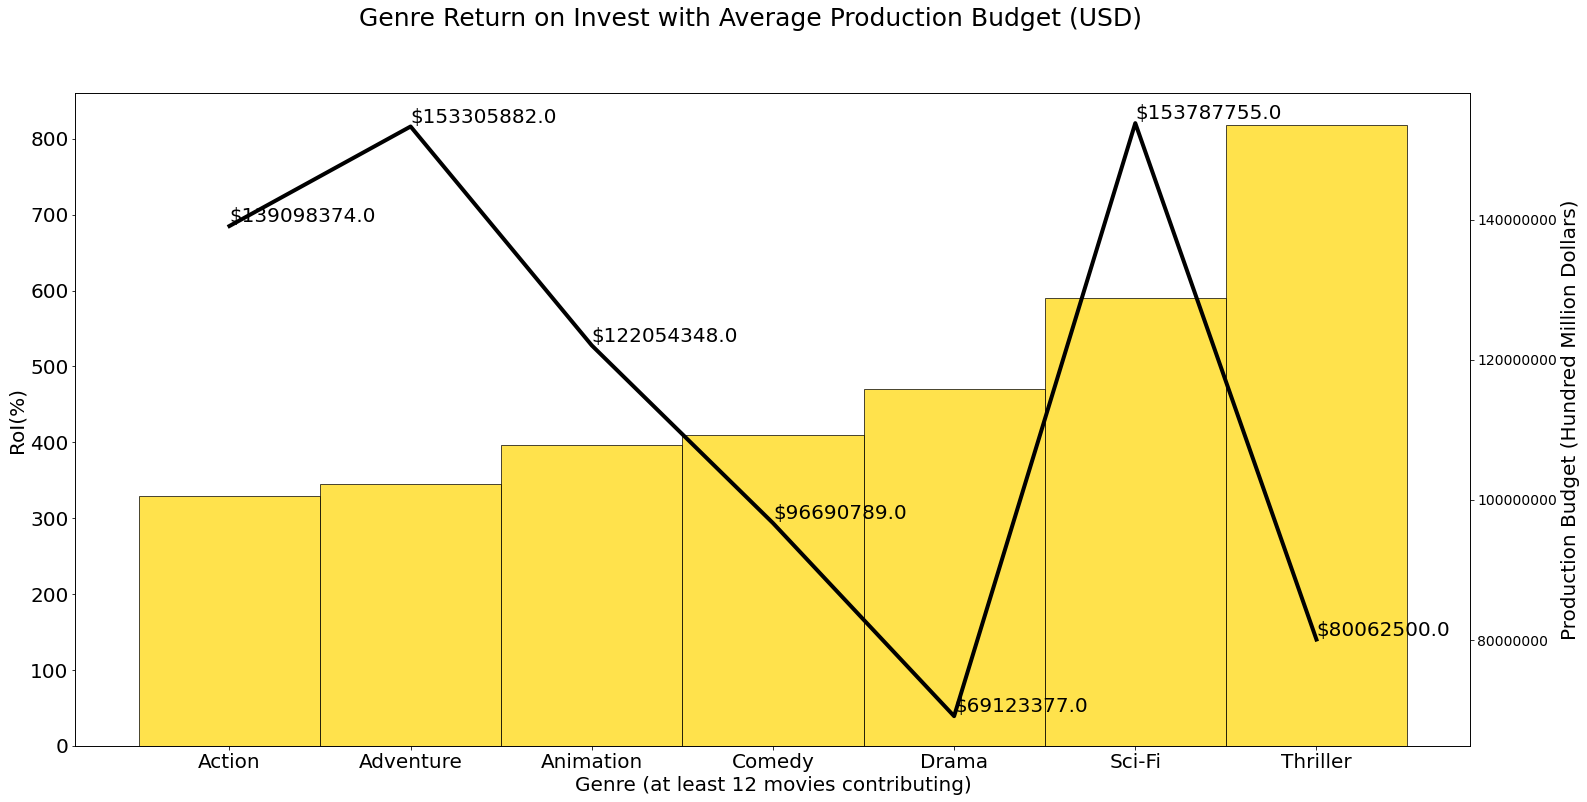

In [192]:
# Round ax2 annotation to a whole number
df_genre_budget = np.round(df_genre_budget)

#Creating dual-y graph to depict RoI of each genre with the average original budget
fig, ax1 = plt.subplots(figsize=(25, 12))
ax2 = ax1.twinx()
plt.ticklabel_format(style='plain', axis='y')

#Annotation for biographies, comedies, and dramas
ax1.bar(genre_names, genre_values, color="gold", edgecolor="black", alpha=0.7, width=1.0)
ax2.plot(df_genre_budget, color="black", lw=4)

#Annotation for production budget values
for i, txt in enumerate(df_genre_budget):
    ax2.text(i, txt, f"${txt}", ha="left", va="bottom", fontsize=20)
    
ax1.set_xlabel("Genre (at least 12 movies contributing)", fontsize=20)
#Increased tick mark text size
ax1.tick_params(axis="x", labelsize=20)
ax1.set_ylabel("RoI(%)", fontsize=20)
ax1.tick_params(axis="y", labelsize=20)

ax2.set_ylabel("Production Budget (Hundred Million Dollars)", fontsize=20)
ax2.tick_params(axis="y", labelsize=14)


fig.suptitle("Genre Return on Invest with Average Production Budget (USD)", fontsize=25);

Using the Matplotlib library to create a horizontal bar chart in Python.

- The parent_profit_names and parent_profit_values variables are created using the index and values attributes of the parent_profit Series object, respectively. These variables will be used as the x- and y-axis data for the chart.
- A figure and subplot (a horizontal bar chart) are created using the subplots function from Matplotlib.
- The horizontal bar chart is plotted using the barh function, with the parent_profit_names and parent_profit_values variables as the y- and x-axis data, respectively.
- The x-axis label, y-axis label, and chart title are set using the set_xlabel, set_ylabel, and set_title functions, respectively.
- The show function is called to display the chart.

**Analysis**
- Walt Disney and Fox have the highest profits. 
- I noticed in researching that all of the studios listed have bought or acquired through purchase many studios who contribute to their profit
- This is a saturated market with established competition. Microsoft may want to look into purchases small to medium studios in an effort to mirror the success of Walt Disney and Fox

#The labels for average studio profit from BoxOffice Mojo
parent_profit_names = parent_profit.index
parent_profit_values = parent_profit.values

#Creating horizontal bar graph
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.15, left=0.5)
plt.ticklabel_format(style='plain', axis='x')

ax.barh(parent_profit.index,parent_profit.values, color='green', edgecolor='black', alpha=0.9)
ax.set_xlabel('Average Profits (Hundred Million U.S. Dollars)', fontsize=18)
ax.set_ylabel('Studio', fontsize=18)
ax.set_title("Average Profit of Studios", fontsize=25)


plt.show()

Using the Matplotlib library to create a bar chart:

- The labels and data variables are created using the index and values attributes of the monthly_counts Series object, respectively. These variables will be used as the x- and y-axis data for the chart.
- A figure and subplot (a bar chart) are created using the subplots function from Matplotlib.
- The bar chart is plotted using the bar function, with the labels and data variables as the x- and y-axis data, respectively.
- The x-axis label, y-axis label, and chart title are set using the set_xlabel, set_ylabel, and set_title functions, respectively.

**Analysis**
- Microsoft should aim for a late fall/winter release, November-December
- The months of January, August, and April should be avoided 

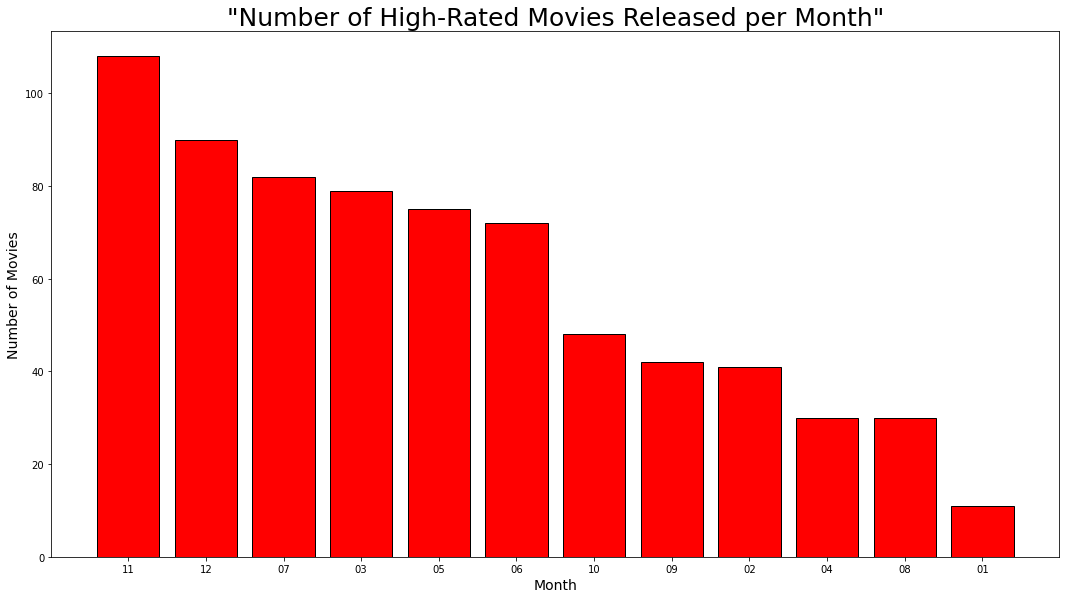

In [180]:
# Get the labels for the unique months and the value counts for each month
labels = monthly_counts.index
data = monthly_counts.values

# Create the bar graph
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.15, left=0.2)

#Add titles and axis details
ax.bar(monthly_counts.index,monthly_counts.values, color='red', edgecolor='black')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Movies', fontsize=14)
ax.set_title('"Number of High-Rated Movies Released per Month"', fontsize=25)

plt.show()

Using the Pandas, NumPy, Matplotlib, and Seaborn libraries to create a heatmap:

- The Seaborn library is imported using import seaborn as sns.
- A figure with a specified size is created using the figure function from Matplotlib.
- The query method is used to filter the mass_df DataFrame to only include movies with an average rating of 8.0 or higher. This filtered DataFrame is assigned to the filtered_df variable.
- A boolean mask is created using the isin method to filter the filtered_df DataFrame to only include the desired genres.
- The heatmap function from Seaborn is used to create the heatmap, with the filtered and pivoted filtered_df DataFrame as the data. The cmap, annot, and linewidth parameters are also specified.
- The chart title and axis labels are set using the title, xlabel, and ylabel functions from Matplotlib.

**Analysis**
- Comedies should be no longer than 105 minutes as this is when they receive the highest rating among audiences
- Sci-Fi, Drama, and Adventure should aim for a 169 minute runtime to achieve high ratings
- Action and Thriller were ranked highest at 149 minutes and 162 minutes

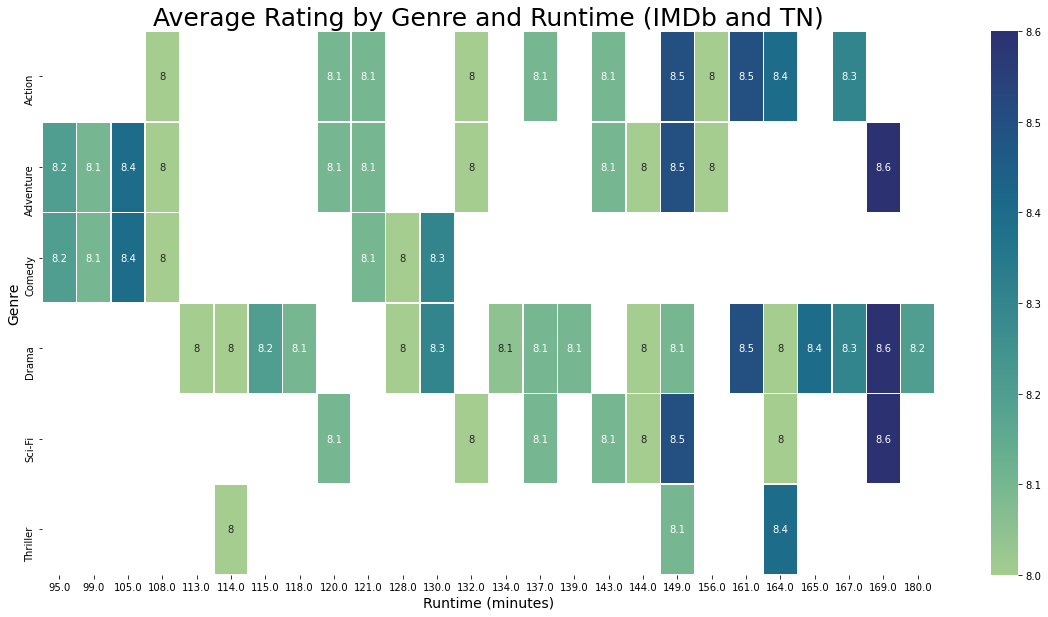

In [188]:
#Seaborn provides an easier method of creating heatmaps when coupled with matplotlib
import seaborn as sns

#Figure resized to better read
plt.figure(figsize=(20,10))

# Use the query method to filter the data to only include movies with an average rating of 8.0 or higher
filtered_df = mass_df.query('averagerating >= 8.0')

# Create a boolean mask to filter the data to only include the desired genres
mask = filtered_df['genres'].isin(['Drama', 'Comedy', 'Sci-Fi', 'Action', 'Adventure', 'Thriller'])

# Use the heatmap function from seaborn to create the heatmap
sns.heatmap(filtered_df[mask].pivot_table(index='genres', columns='runtime_minutes', values='averagerating'), cmap='crest', annot = True, linewidth = 0.5)

# Add a title and axis labels
plt.title('Average Rating by Genre and Runtime (IMDb and TN)', fontsize=25)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()


## Conclusion
- Acquiring smaller studios with promising content, in order to potentially boost profits and tap into established competition.

- Produce cost-effective genres: Drama, Comedy, and Biographies

- Release in the fall, specifically November to maximize profits

- Comedies should be no longer than 1 hr. 45 minutes

- Adventure, Drama, and Thrillers should be at least 2hrs. 49 minutes


## Next Steps
- Beginning research into purchasable studios of medium to high value for Microsoft to bring on under their entertainment name. This mirrors that steps taken by current competitors. 
- Connecting high performing producers, directors, and writers to the above data for potential partnership decisions. 
- MPAA ratings should also be taken into account for popularity and profit.